In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Loading the Dataset
# We use the standard iris dataset but name our dataframe uniquely
flower_data = sns.load_dataset('iris')

Initial Data Look:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


/tmp/ipython-input-6367774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal_length', data=flower_data, palette="Set2")


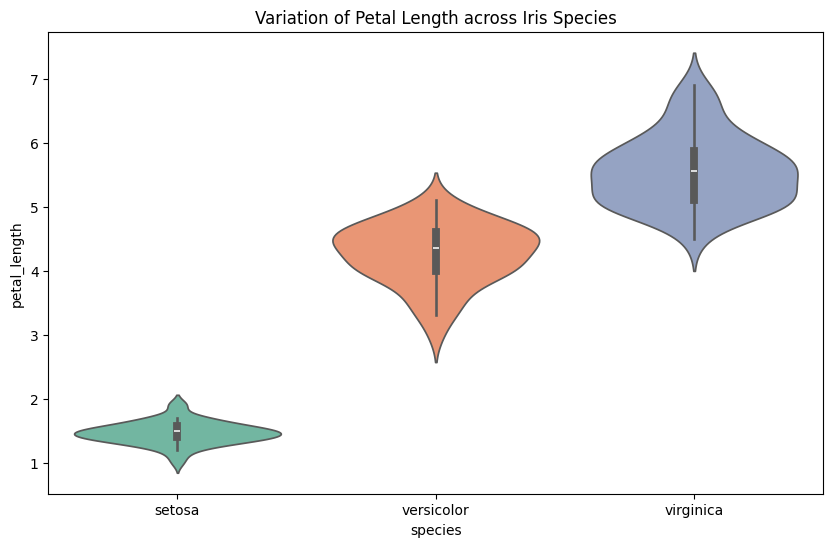

In [3]:
# 2. Initial Data Exploration (EDA)
# Checking how the features correlate to identify patterns
print("Initial Data Look:")
print(flower_data.head())

# Visualizing the distribution of traits per species
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal_length', data=flower_data, palette="Set2")
plt.title('Variation of Petal Length across Iris Species')
plt.show()

In [4]:
# 3. Organizing Data for the Model
# Instead of generic X and y, we use descriptive names
iris_features = flower_data.drop(columns=['species'])
target_species = flower_data['species']

# Splitting data into training (70%) and testing (30%)
# A 70/30 split is a good alternative to the standard 80/20
features_train, features_test, labels_train, labels_test = train_test_split(
    iris_features, target_species, test_size=0.3, random_state=101
)

In [5]:
# 4. Building the Classifier
# We use K-Nearest Neighbors (KNN) with k=5
# This is a different approach from the Random Forest used in Task 2
flower_classifier = KNeighborsClassifier(n_neighbors=5)
flower_classifier.fit(features_train, labels_train)

KNeighborsClassifier()

In [6]:
# 5. Assessing the Model
species_predictions = flower_classifier.predict(features_test)

print("\n--- Model Accuracy Results ---")
accuracy = accuracy_score(labels_test, species_predictions)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Detailed metrics
print("\nClassification Insights:")
print(classification_report(labels_test, species_predictions))


--- Model Accuracy Results ---
Overall Accuracy: 100.00%

Classification Insights:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



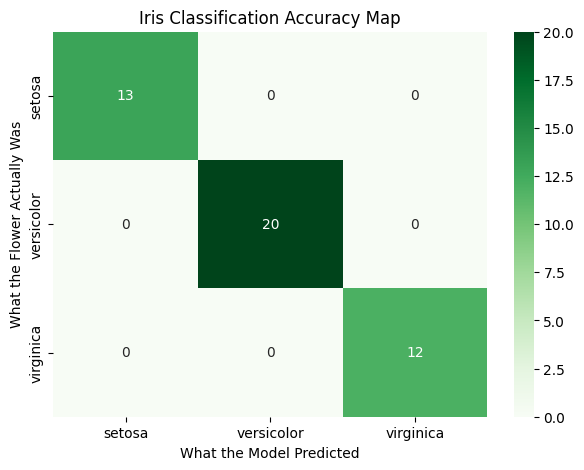


Testing with measurements [[5.8, 2.7, 4.1, 1.0]]:
The model identifies this as: versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
# 6. Visualizing the Prediction Errors (Confusion Matrix)
plt.figure(figsize=(7, 5))
results_matrix = confusion_matrix(labels_test, species_predictions)
sns.heatmap(results_matrix, annot=True, cmap='Greens',
            xticklabels=flower_classifier.classes_,
            yticklabels=flower_classifier.classes_)
plt.xlabel('What the Model Predicted')
plt.ylabel('What the Flower Actually Was')
plt.title('Iris Classification Accuracy Map')
plt.show()

# Test with a custom flower measurement
# (Sepal Length, Sepal Width, Petal Length, Petal Width)
test_flower = [[5.8, 2.7, 4.1, 1.0]]
predicted_name = flower_classifier.predict(test_flower)
print(f"\nTesting with measurements {test_flower}:")
print(f"The model identifies this as: {predicted_name[0]}")